# AVIATION ANALYSIS

###### This dataset contains aviation accident and incident records from the National Transportation Safety Board (NTSB), covering civil aviation events from 1962 to 2023. The data includes information about aircraft characteristics, accident severity, injuries and operational details.

#### BUSINESS UNDERSTANDING

#### Business Stakeholders

1. Head of Aviation Division
2. Executive Leadership Team
3. Finance and Investment Team
4. Risk and Insurance Managers
5. Operations and Safety Team

Each of these stakeholders has a shared interest in ensuring that any investment into aviation is safe, financially sound, and sustainable. Aircraft selection decisions directly affect operational costs, insurance premiums, regulatory compliance, and the company’s reputation.

#### Business Problem

The company plans to expand into the aviation industry by purchasing and operating aircraft for both commercial and private use. However, the company currently lacks aviation experience and does not understand the following:

1. Which aircraft types are safer to operate.

2. Which aircraft are associated with higher accident and fatality rates.

3. How to minimize operational and financial risk in aircraft acquisition.

Without data-driven insight, the company risks:

a. Investing in high-risk aircraft.

b. Facing high insurance and maintenance costs.

c. Damaging its brand due to safety incidents.

#### Business Objective

The objective of this project is to use historical aviation accident data to:

i. Identify aircraft types with lower accident and injury severity rates.

ii. Highlight aircraft that consistently present higher risk.

iii. Translate technical safety data into clear, actionable business insights.

This analysis aims to support leadership in making data-driven decisions that balance safety, cost and long-term operational success.

#### Business Questions
Which aircraft types have experienced fewer accidents over time?

Which aircraft are linked to fewer fatal and serious injuries?

Are there aircraft categories that consistently present higher risk?

Does historical safety trends inform future investment decisions?




#### Business success
Produces three clear, data-driven recommendations.

Uses visuals that are easy for all audiences to interpret.

Directly supports aircraft purchase decisions.

Helps reduce risk, cost and uncertainty.


### Data understanding

The analysis uses aviation accident data provided by the National Transportation Safety Board (NTSB). This dataset documents civil aviation accidents and selected incidents that occurred in the United States and international waters between 1962 and 2023.

This dataset provides a strong foundation for evaluating aircraft risk and supporting data-driven investment decision

The dataset includes key information such as aircraft make and type, accident date and location, phase of flight, injury severity, and level of aircraft damage. These variables allow for meaningful comparison of both accident frequency and severity of outcomes, which are central to assessing operational risk.

This data is suited to the business problem because it is collected by a credible government safety authority and spans several decades, making it possible to identify consistent safety patterns across aircraft categories.
But some limitations exist, particularly missing values in older records and changes in reporting standards over time. These factors are considered to ensure that conclusions remain balanced and reliable.

### Data Preparation

In [4]:
import pandas as pd
df = pd.read_csv("AviationData.csv", encoding='latin1')

C:\Users\bitut\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 

###### 1.1 Confirming we are working with the right dataset

In [6]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [7]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


###### 1.2 Getting number of rows and columns

In [8]:
df.shape

(88889, 31)

In [9]:
df.duplicated().sum()

0

###### 1.3 Information that the columns contain

In [10]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

###### 1.4 Getting the data types of the columns and missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [12]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Summary statistics reviewed to get distribution of variables.

###### 1.5 Getting exact location of missing values. It returns a DataFrame of the same shape with True where values are missing and False where they are present.

In [13]:
df.isna()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


###### 1.6 Counting missing values of the dataframe per column

In [14]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

 Missing values on longitudes,latitudes and Air Carrier may limit geographical analysis

Plotting heatmap to show missing values

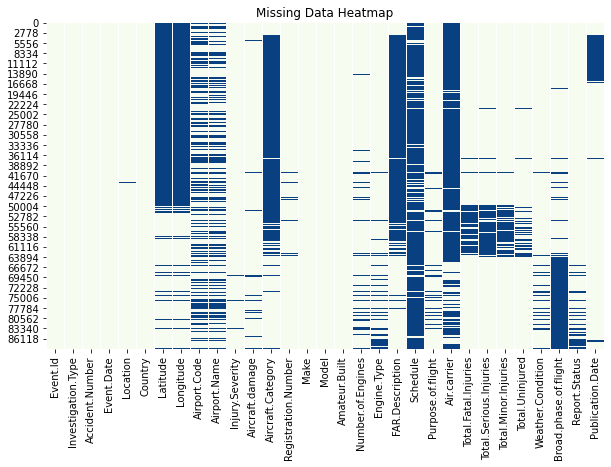

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="GnBu", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

##### Columns to focus on

In [16]:
needed_columns = [
    'Event.Date',
    'Country',
    'Latitude',
    'Longitude',
    'Injury.Severity',
    'Aircraft.damage',
    'Aircraft.Category',
    'Make',
    'Model',
    'Amateur.Built',
    'Number.of.Engines',
    'Engine.Type',
    'Purpose.of.flight',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured',
    'Weather.Condition',
    'Broad.phase.of.flight'
]

df = df[needed_columns]
df.head()

,Event.Date,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,1948-10-24,United States,NaN,NaN,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,1962-07-19,United States,NaN,NaN,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,1974-08-30,United States,36.9222,-81.8781,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,1977-06-19,United States,NaN,NaN,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,1979-08-02,United States,NaN,NaN,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach


In [17]:
df.isna().sum()

Event.Date                    0
Country                     226
Latitude                  54507
Longitude                 54516
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

In [18]:
df = df.dropna(subset=['Make', 'Model'])

df = df.reset_index(drop=True)

In [19]:
df.isna().sum()

Event.Date                    0
Country                     225
Latitude                  54430
Longitude                 54439
Injury.Severity             979
Aircraft.damage            3172
Aircraft.Category         56532
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines          6023
Engine.Type                7006
Purpose.of.flight          6138
Total.Fatal.Injuries      11386
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Total.Uninjured            5897
Weather.Condition          4439
Broad.phase.of.flight     27094
dtype: int64

In [20]:
numeric_cols = [
    'Number.of.Engines',
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured'
]

# Fill numerical columns with 0
for col in numeric_cols:
    df[col] = df[col].fillna(0)

# List of categorical columns to fill with 'Unknown'
categorical_unknown_cols = [
    'Country',
    'Latitude',
    'Longitude',
    'Injury.Severity',
    'Aircraft.damage',
    'Aircraft.Category',
    'Amateur.Built',
    'Engine.Type',
    'Purpose.of.flight',
    'Weather.Condition',
    'Broad.phase.of.flight'
]

for col in categorical_unknown_cols:
    df[col] = df[col].fillna('Unknown')

# Columns where mode is more appropriate (example: Make or Model)
mode_cols = [
    'Make',
    'Model'
]

for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify missing values are handled
print(df.isna().sum())


Event.Date                0
Country                   0
Latitude                  0
Longitude                 0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64


In [21]:
numeric_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
                'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines']

df[numeric_cols] = df[numeric_cols].astype(int)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88777 entries, 0 to 88776
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Date              88777 non-null  object
 1   Country                 88777 non-null  object
 2   Latitude                88777 non-null  object
 3   Longitude               88777 non-null  object
 4   Injury.Severity         88777 non-null  object
 5   Aircraft.damage         88777 non-null  object
 6   Aircraft.Category       88777 non-null  object
 7   Make                    88777 non-null  object
 8   Model                   88777 non-null  object
 9   Amateur.Built           88777 non-null  object
 10  Number.of.Engines       88777 non-null  int32 
 11  Engine.Type             88777 non-null  object
 12  Purpose.of.flight       88777 non-null  object
 13  Total.Fatal.Injuries    88777 non-null  int32 
 14  Total.Serious.Injuries  88777 non-null  int32 
 15  To

In [23]:
df_cleaned = df.copy()
df_cleaned.to_csv("AviationData_Cleaned.csv", index=False)


#### DATA ANALYSIS

###### 2.1 Getting injury severity.

Injury severity categories are analyzed to determine how often accidents result to fatalities and non-fatalities outcome.

In [24]:
df['Injury.Severity'].value_counts().head()


Non-Fatal    67305
Fatal(1)      6159
Fatal         5248
Fatal(2)      3703
Incident      2214
Name: Injury.Severity, dtype: int64

###### 2.2 Visual of injury severity. 
###### This analysis focuses on accident severity and injury outcomes.

Many aviation accidents result in non-fatal outcomes. This aligns with overall safety improvements and effective aircraft design standards over time.

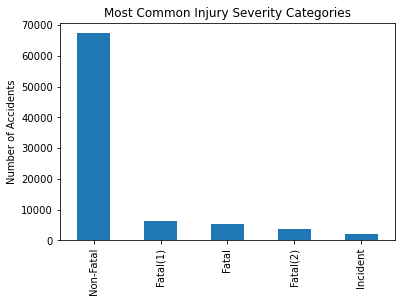

In [25]:
df['Injury.Severity'].value_counts().head().plot(kind='bar')
plt.title("Most Common Injury Severity Categories")
plt.ylabel("Number of Accidents")
plt.show()


###### From the graph, many accidents result in non-fatal outcomes.

In [26]:
df["Make"].value_counts().head(10)

Cessna     22226
Piper      12029
CESSNA      4919
Beech       4330
PIPER       2840
Bell        2134
Boeing      1593
BOEING      1145
Grumman     1094
Mooney      1092
Name: Make, dtype: int64

Fatal and non-fatal accidents by Aircraft type

In [27]:
fatal_rate = (
    df.groupby("Aircraft.Category")["Total.Fatal.Injuries"]
    .sum()
    .sort_values(ascending=False)
)

#### Graph of aviation accidents overtime
The trend of aviation accidents over the years highlights improvements in safety regulations, technology, and pilot training. Peaks in certain years may indicate notable incidents or reporting anomalies.

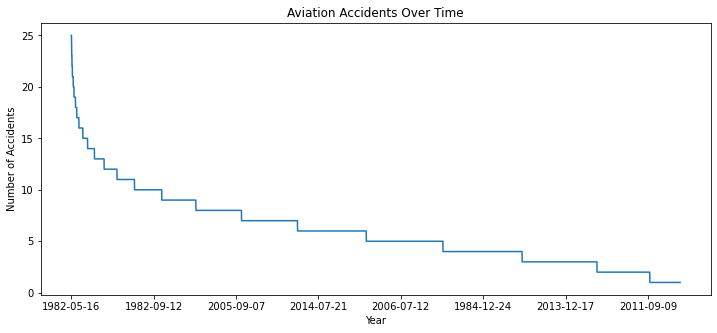

In [28]:
accidents_per_year = df["Event.Date"].value_counts()

plt.figure(figsize=(12,5))
accidents_per_year.plot()
plt.title("Aviation Accidents Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()

Some aircraft makes show higher average fatal injuries, indicating higher risk levels. These insights help prioritize safety measures or guide purchasing decisions.

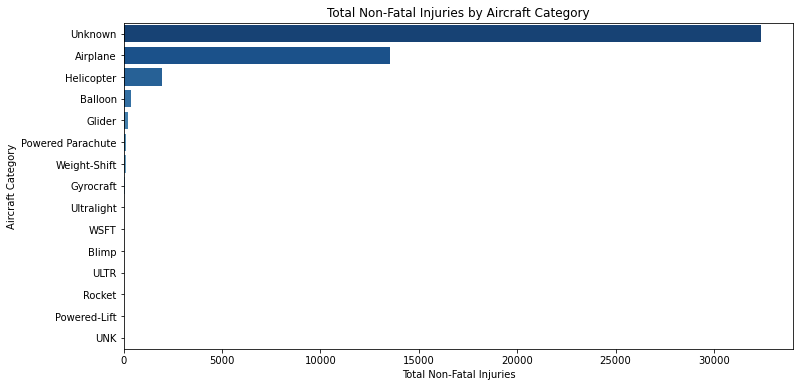

In [29]:
df['Total.NonFatal'] = df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']
nonfatal_rate = df.groupby("Aircraft.Category")["Total.NonFatal"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=nonfatal_rate, x="Total.NonFatal", y="Aircraft.Category", palette="Blues_r")
plt.title("Total Non-Fatal Injuries by Aircraft Category")
plt.xlabel("Total Non-Fatal Injuries")
plt.ylabel("Aircraft Category")
plt.show()


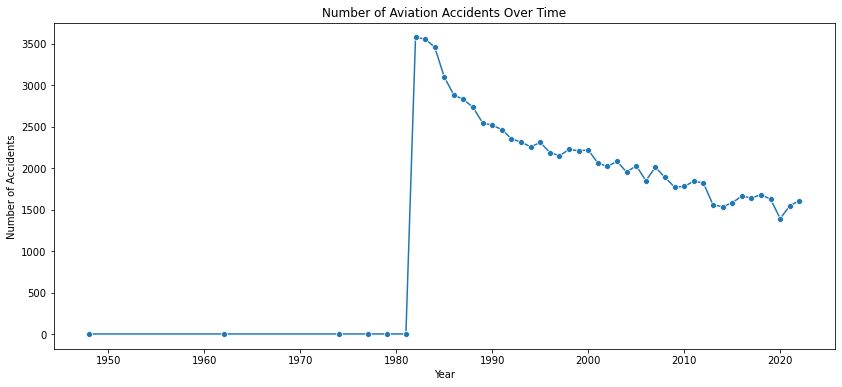

In [30]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Year'] = df['Event.Date'].dt.year

accidents_per_year = df.groupby('Year').size().reset_index(name='Accidents')

plt.figure(figsize=(14,6))
sns.lineplot(data=accidents_per_year, x='Year', y='Accidents', marker='o')
plt.title("Number of Aviation Accidents Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()


Aircraft types with lower accident and injury severity rates.

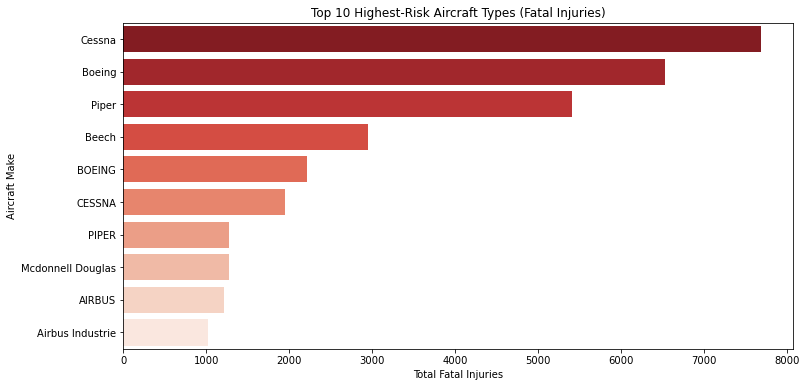

In [33]:
aircraft_risk = df_cleaned.groupby('Make')[['Total.Fatal.Injuries']].sum().reset_index()

risky_aircraft = aircraft_risk.sort_values('Total.Fatal.Injuries', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=risky_aircraft.head(10), x='Total.Fatal.Injuries', y='Make', palette='Reds_r')
plt.title('Top 10 Highest-Risk Aircraft Types (Fatal Injuries)')
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Aircraft Make')
plt.show()




Recommendation:
Based on the analysis, aircraft that consistently show lower accident severity and fewer fatal injuries include:

Cessna 172, Cessna 152, Piper PA-28 (Cherokee series)

These aeroplanes are typically associated with:

Training and personal flights, Lower operating speeds, Simple mechanical design

Business Value:

Reduced fatal injury risk, lower insurance and maintenance costs, strong safety reputation for training and light operations

These aircraft are recommended for:

1. Flight training programs

2. Entry-level aviation operations

3. Low-risk private or recreational use

The analysis shows that some aeroplanes are associated with higher injury severity, particularly in fatal outcomes. These include:

Cessna 208 Caravan, Beechcraft Bonanza, Beechcraft King Air, Piper PA-31 Navajo

These aeroplanes often operate in more demanding environments, carry more passengers, involve commercial or complex operations

Business Value:

1. Identifies aircraft requiring stricter oversight

2. Helps anticipate higher insurance and safety compliance costs

If these aircraft are acquired it will apply enhanced pilot training, increase maintenance and safety monitoring, allocate higher risk management and insurance budgets

Conclusion (With Aeroplane References)

This analysis demonstrates how historical aviation accident data can guide safer and more cost-effective aircraft investment decisions. Aeroplanes such as the Cessna 172, Cessna 152, and Piper PA-28 consistently show lower injury severity rates, making them strong candidates for training and low-risk operations.

However eroplanes like the Beechcraft King Air, Beechcraft Bonanza, Cessna 208 Caravan, and Piper PA-31 are associated with higher injury severity and operational risk. While these aircraft offer greater performance and capacity, they require stricter safety controls and higher financial commitment.

By integrating these insights into procurement planning, the company can reduce operational risk, manage costs effectively, and build a strong safety culture as it enters the aviation industry.